### Installing API and dowloading dataset, unzipping it

In [ ]:
!pip install -q kaggle

    # A button will appear to upload files make sure you upload the kaggle.json you downloaded in previous step.
from google.colab import files
files.upload()

!mkdir /root/.kaggle              # make a .kaggle dir (needed)
!mv kaggle.json /root/.kaggle/    # move the kaggle.json into it (needed)
!chmod 600 /root/.kaggle/kaggle.json  # change the perms of the file(needed)

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        292           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        130           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        371           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2499            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      18484            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4871            True  
connectx

In [ ]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 30.9MB/s]
 97% 527M/543M [00:05<00:00, 95.2MB/s]
100% 543M/543M [00:05<00:00, 99.2MB/s]
 93% 253M/271M [00:02<00:00, 76.1MB/s]
100% 271M/271M [00:03<00:00, 93.3MB/s]


In [ ]:
!unzip train.zip

In [ ]:
!unzip test1.zip

### Preparing the data

In [ ]:
import os, shutil

original_train_dir = '/content/train'
original_test_dir = '/content/test1'

base_dir = '/content/cats_and_dogs'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

In [ ]:
for i in range(10000):
    fname = f'cat.{i}.jpg'
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

for i in range(10000, 12500):
    fname = f'cat.{i}.jpg'
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
for i in range(10000):
    fname = f'dog.{i}.jpg'
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

for i in range(10000, 12500):
    fname = f'dog.{i}.jpg'
    src = os.path.join(original_train_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print("Train cats and validation cats length", len(os.listdir(train_cats_dir)),\
      len(os.listdir(validation_cats_dir)))

Train cats and validation cats length 10000 2500


In [ ]:
print("Train dogs and validation dogs length", len(os.listdir(train_dogs_dir)),\
      len(os.listdir(validation_dogs_dir)))

Train dogs and validation dogs length 10000 2500


### Building the model

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=100,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = (20000//100),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=(5000//100)
)

Epoch 1/30
200/200 [==============================] - 64s 321ms/step - loss: 0.6938 - acc: 0.5853 - val_loss: 0.5743 - val_acc: 0.6948
Epoch 2/30
200/200 [==============================] - 64s 319ms/step - loss: 0.5809 - acc: 0.6962 - val_loss: 0.4710 - val_acc: 0.7776
Epoch 3/30
200/200 [==============================] - 63s 317ms/step - loss: 0.4821 - acc: 0.7676 - val_loss: 0.4172 - val_acc: 0.8026
Epoch 4/30
200/200 [==============================] - 64s 318ms/step - loss: 0.4086 - acc: 0.8145 - val_loss: 0.3628 - val_acc: 0.8366
Epoch 5/30
200/200 [==============================] - 63s 317ms/step - loss: 0.3541 - acc: 0.8424 - val_loss: 0.3786 - val_acc: 0.8288
Epoch 6/30
200/200 [==============================] - 64s 318ms/step - loss: 0.2952 - acc: 0.8705 - val_loss: 0.3130 - val_acc: 0.8640
Epoch 7/30
200/200 [==============================] - 63s 315ms/step - loss: 0.2505 - acc: 0.8938 - val_loss: 0.3805 - val_acc: 0.8360
Epoch 8/30
200/200 [==============================] - 6

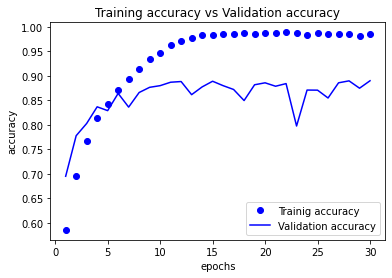

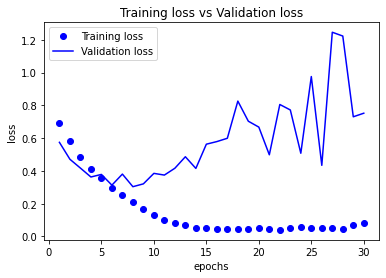

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Trainig accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [ ]:
model.save("baseline.h5")

### Data augmentation

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=100
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=100
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=(20000//100),
    validation_data=validation_generator,
    validation_steps=(5000//100),
    epochs=30
)

Epoch 1/30
200/200 [==============================] - 143s 716ms/step - loss: 0.7362 - acc: 0.5467 - val_loss: 0.8844 - val_acc: 0.5146
Epoch 2/30
200/200 [==============================] - 143s 717ms/step - loss: 0.6588 - acc: 0.6191 - val_loss: 0.6138 - val_acc: 0.6508
Epoch 3/30
200/200 [==============================] - 144s 720ms/step - loss: 0.6085 - acc: 0.6705 - val_loss: 0.5198 - val_acc: 0.7468
Epoch 4/30
200/200 [==============================] - 144s 722ms/step - loss: 0.5697 - acc: 0.7057 - val_loss: 0.4730 - val_acc: 0.7882
Epoch 5/30
200/200 [==============================] - 144s 720ms/step - loss: 0.5386 - acc: 0.7278 - val_loss: 0.5099 - val_acc: 0.7556
Epoch 6/30
200/200 [==============================] - 144s 720ms/step - loss: 0.5041 - acc: 0.7570 - val_loss: 0.4911 - val_acc: 0.7698
Epoch 7/30
200/200 [==============================] - 144s 718ms/step - loss: 0.4900 - acc: 0.7653 - val_loss: 0.3918 - val_acc: 0.8258
Epoch 8/30
200/200 [============================

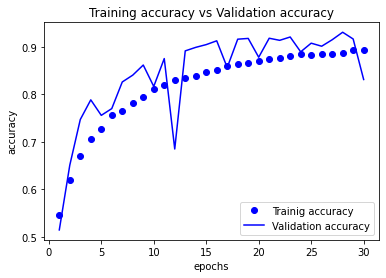

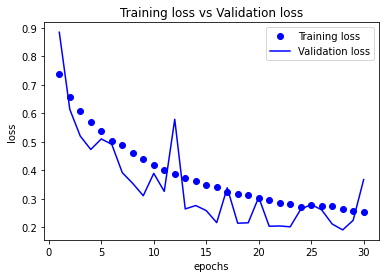

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Trainig accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training accuracy vs Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss vs Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [ ]:
model.save("augmented_model.h5")

In [ ]:
from google.colab import files
files.upload()

In [ ]:
from keras.preprocessing import image
import numpy as np

img = image.load_img('/content/cat_1.jpeg', target_size=(150, 150))
img = image.img_to_array(img)
img = np.array([img])
img = img / 255
img.shape

(1, 150, 150, 3)

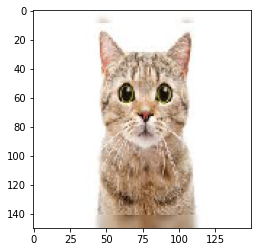

In [ ]:
plt.imshow(img.reshape((150, 150, 3)))

In [ ]:
pred = model.predict(img)
pred[0]

array([0.01450528], dtype=float32)

In [ ]:
from google.colab import files
files.upload()

In [ ]:
img = image.load_img('/content/dog_1.jpeg', target_size=(150, 150))
img = image.img_to_array(img)
img = np.array([img])
img = img / 255
img.shape

(1, 150, 150, 3)

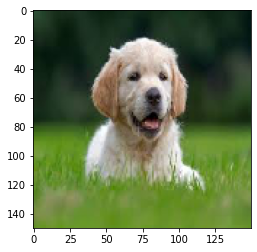

In [ ]:
plt.imshow(img.reshape((150, 150, 3)))

In [ ]:
pred = model.predict(img)
pred[0]

array([1.], dtype=float32)

In [ ]:
from google.colab import files
files.upload()

In [53]:
img = image.load_img('/content/cat_2.jpg', target_size=(150, 150))
img = image.img_to_array(img)
img = np.array([img])
img = img / 255
img.shape

(1, 150, 150, 3)

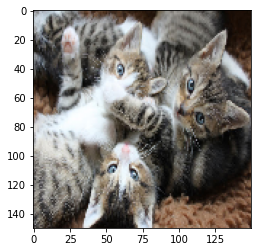

In [54]:
plt.imshow(img.reshape((150, 150, 3)))

In [55]:
pred = model.predict(img)
pred[0]

array([0.5468455], dtype=float32)

In [ ]:
from google.colab import files
files.upload()

In [57]:
img = image.load_img('/content/cat_3.jpg', target_size=(150, 150))
img = image.img_to_array(img)
img = np.array([img])
img = img / 255
img.shape

(1, 150, 150, 3)

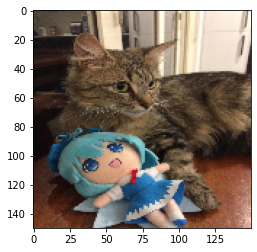

In [58]:
plt.imshow(img.reshape((150, 150, 3)))

In [59]:
pred = model.predict(img)
pred[0]

array([0.33074597], dtype=float32)

In [ ]:
from google.colab import files
files.upload()

In [61]:
img = image.load_img('/content/dog_2.jpg', target_size=(150, 150))
img = image.img_to_array(img)
img = np.array([img])
img = img / 255
img.shape

(1, 150, 150, 3)

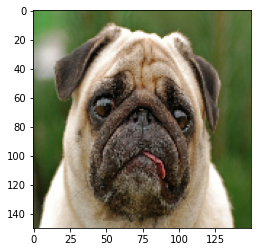

In [62]:
plt.imshow(img.reshape((150, 150, 3)))

In [63]:
pred = model.predict(img)
pred[0]

array([0.9995334], dtype=float32)